<a href="https://colab.research.google.com/github/HosseinEyvazi/Vision-AI-Booklet/blob/main/Vision2_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3,2D Pose Estimation

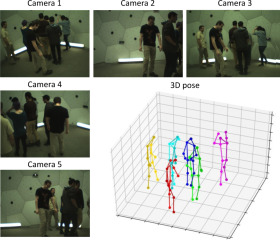

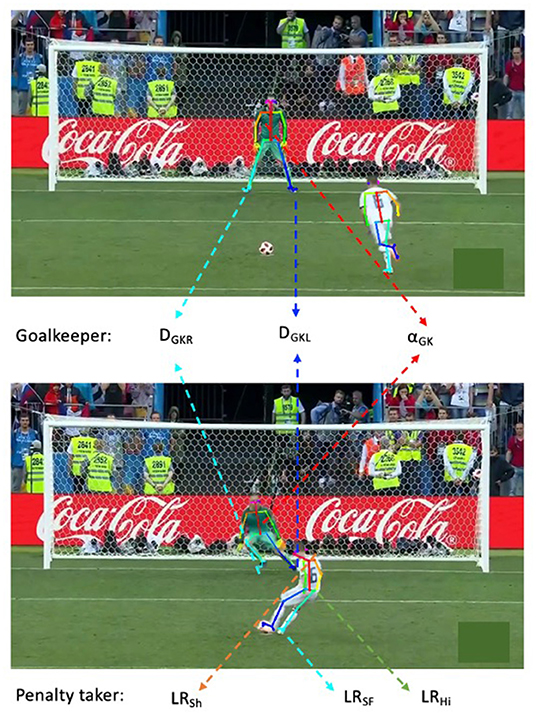

## 📘 **Pose Estimation in a Nutshell**

---

### 1. What Is Pose Estimation?

Pose estimation is a vision task that **localises anatomical landmarks (“keypoints”)** of a person (or object) in an image or video. Connecting these keypoints yields a **skeleton** that describes posture, motion and orientation.

---

### 2. Main Flavours

| Type                    | Output                                 | Typical Uses                              |
| ----------------------- | -------------------------------------- | ----------------------------------------- |
| **2‑D Pose Estimation** | (x, y) pixel coordinates               | AR filters, fitness apps, gesture control |
| **3‑D Pose Estimation** | (x, y, z) world or camera‑space coords | Motion‑capture, biomechanics, VR avatars  |

---

### 3. Core Ideas & Terminology

| Term                             | Short Explanation                                                                                                         |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Keypoints**                    | Discrete joints (e.g., nose, wrists, ankles).                                                                             |
| **Heatmaps**                     | Per‑keypoint probability maps; peak = joint location.                                                                     |
| **Skeleton**                     | Graph of keypoints connected by limbs.                                                                                    |
| **Part Affinity Fields (PAF)**   | 2‑D vector fields that encode limb direction; used to **group detected keypoints into individual people** (multi‑person). |
| **Multi‑Person Pose Estimation** | Detect all people & their skeletons in one shot (e.g., OpenPose’s PAF, HRNet‑W32’s higher‑resolution features).           |
| **3‑D Pose Estimation**          | Lifts 2‑D detections to depth, or predicts 3‑D directly from RGB / depth / multi‑view input.                              |

---

### 4. Key Algorithms & Representative Models

| Approach                     | Hallmark Model / Paper                    | Essence (one‑liner)                                                         |
| ---------------------------- | ----------------------------------------- | --------------------------------------------------------------------------- |
| **Direct Regression**        | *DeepPose* (Toshev & Szegedy, 2014)       | CNN directly regresses joint coordinates.                                   |
| **Heatmap Regression**       | *Stacked Hourglass* (Newell et al., 2016) | Repeated down‑/up‑sampling refines heatmaps.                                |
| **Part Affinity Fields**     | *OpenPose* (Cao et al., 2017)             | Learns keypoint heatmaps **+ limb vector fields** for multi‑person parsing. |
| **High‑Resolution Features** | *HRNet* (Sun et al., 2019)                | Maintains high‑res stream; excels in crowded scenes.                        |
| **Transformer‑based**        | *TokenPose* (Li et al., 2021)             | Uses ViT tokens for spatial long‑range context.                             |
| **Video / Temporal**         | *PoseWarper* (Girdhar et al., 2019)       | Aligns features across frames for smoother pose.                            |

---

### 5. Six Influential Papers to Start With

1. **DeepPose** – *Deep Neural Networks for Human Pose Estimation* (Google, CVPR 2014)
2. **Convolutional Pose Machines** (Wei et al., CVPR 2016)
3. **Stacked Hourglass Networks for Human Pose Estimation** (Newell et al., ECCV 2016)
4. **Realtime Multi‑Person 2‑D Pose Estimation Using Part Affinity Fields** (Cao et al., CVPR 2017 – OpenPose)
5. **Simple Baselines for Human Pose Estimation and Tracking** (Xiao et al., ECCV 2018)
6. **Deep High‑Resolution Representation Learning for Human Pose Estimation** (HRNet, Sun et al., CVPR 2019)

*(These form a chronological “minimum reading list” that shows the field’s evolution.)*

---

### 6. Current Challenges & Research Directions

| Challenge                | Why It’s Hard                                 | Typical Remedies                                                       |
| ------------------------ | --------------------------------------------- | ---------------------------------------------------------------------- |
| **Occlusion**            | Limbs hidden behind objects/people.           | Multi‑view fusion, spatial priors, temporal context.                   |
| **Lighting Variation**   | Low light or harsh shadows.                   | Photometric augmentation, robust features, infrared cameras.           |
| **Viewpoint Changes**    | Extreme camera angles, foreshortening.        | Rotation‑invariant transformers, 3‑D lifting, synthetic training data. |
| **Crowded Scenes**       | Overlapping skeletons confuse detectors.      | High‑res features (HRNet), part affinity fields, graph clustering.     |
| **Real‑Time Constraint** | Mobile & edge devices need < 30 ms inference. | Lightweight backbones (BlazePose), model pruning, quantisation.        |

---

### 7. Quick Recap

* **Pose estimation** converts pixels → keypoints → actionable skeletons.
* **2‑D vs 3‑D** define whether depth is recovered.
* **Heatmap regression** and **PAF** are dominant paradigms; **transformers** are rising.
* **Key applications** span fitness, AR/VR, rehabilitation, sports analytics, surveillance, animation.
* Research still tackles **occlusions, viewpoint extremes, crowded scenes, and speed**.



### Joint vs LandMark

A **joint** is a physical connection point between bones (like elbow or knee), while a **landmark** is any keypoint detected on the body — including joints and non-joints (like nose or eyes). So, every joint is a landmark, but not all landmarks are joints.


### Heatmaps
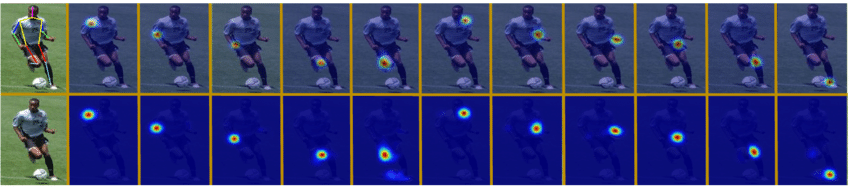

### Occlusion in pose estimation
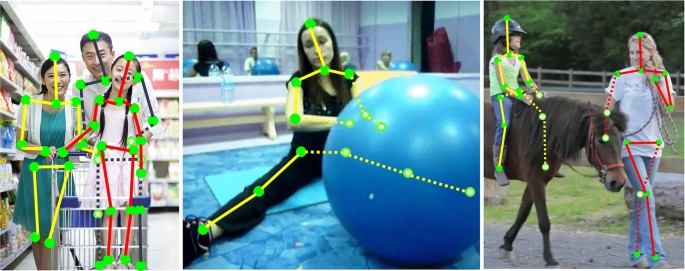

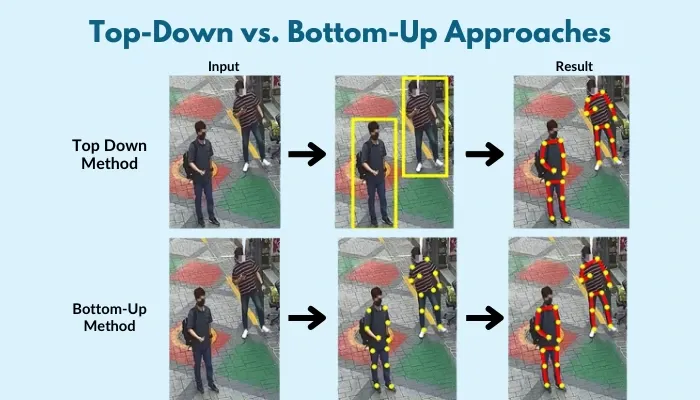

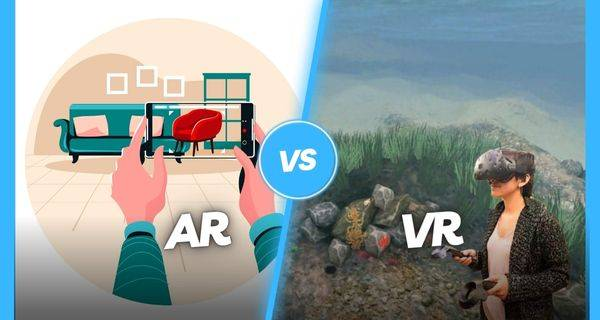

### 📦 MediaPipe for Pose Estimation
**MediaPipe** is a Google framework with fast, ready-to-use **pose estimation**.

* Detects **33 body keypoints** in real-time
* Works on **mobile, desktop, browser**
* No training needed — just plug and play
* Supports Python, JavaScript, Android, iOS
* Ideal for **fitness, AR, gesture control, games**

✅ Efficient, accurate, and great for real-time apps.


In [ ]:
! pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but

In [ ]:


# ── Imports ─────────────────────────────────────────────────────────────
import cv2                                   # OpenCV: camera I/O & drawing
import mediapipe as mp                       # Google MediaPipe: ML vision
import numpy as np                           # Vector maths for angle calc
import math                                  # For angle, but numpy covers it
import time                                  # FPS timing

# ── MediaPipe pose detector setup ───────────────────────────────────────
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Pose() arguments explained:
# • static_image_mode=False → treat the video as a stream; keeps an internal
#   tracker so it only runs the heavy detector when needed.
# • model_complexity=1       → light CPU model (0 = ultra‑light, 2 = heavy).
# • smooth_landmarks=True    → temporal smoothing for less jitter.
# • min_detection_confidence=0.5 → threshold for *first* pose detection.
# • min_tracking_confidence=0.5  → threshold for tracking frames after that.
pose = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)

# ── Helper: elbow‑angle calculator ──────────────────────────────────────
def calculate_angle(a, b, c):
    """
    Return the angle ABC (at point b) in degrees.

    Parameters
    ----------
    a, b, c : (x, y) tuples
        Coordinates of the shoulder (a), elbow (b), and wrist (c).

    Uses the cosine rule:
        cos θ = (ba · bc) / (|ba| |bc|)
    """
    a, b, c = map(np.array, (a, b, c))       # Convert to NumPy arrays
    ba = a - b
    bc = c - b
    # Dot product divided by magnitudes
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Prevent out‑of‑range error
    return np.degrees(np.arccos(cos_angle))

# ── Rep‑counter state variables ─────────────────────────────────────────
counter = 0          # Total completed curls
stage = None         # 'down' (extended) or 'up' (flexed)

ANGLE_DOWN = 160     # ≥ this ⇒ arm considered fully extended
ANGLE_UP   =  40     # ≤ this ⇒ arm considered fully flexed

# ── Video capture ───────────────────────────────────────────────────
cap = cv2.VideoCapture(0)    # 0 = default webcam

if not cap.isOpened():
    raise IOError("Cannot open webcam (check camera index or permissions).")

fps_time = time.time()       # Time of last frame for FPS calc

try:
    # ── Main loop ────────────────────────────────────────────────────
    while True:
        ret, frame = cap.read()
        if not ret:
            print("⚠️  Failed to grab frame")
            break

        # Mirror the image so it feels natural (like a selfie cam)
        frame = cv2.flip(frame, 1)

        # 1. BGR → RGB because MediaPipe expects RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 2. Flag as read‑only to skip a deep copy inside MediaPipe
        image_rgb.flags.writeable = False
        results = pose.process(image_rgb)                               #### First incident of the cv2 and mediapipe
        image_rgb.flags.writeable = True     # Restore writeability

        # 3. Draw landmarks & skeleton if any are detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )

            # Convert normalized landmark coords (0–1) → pixel coords
            h, w, _ = frame.shape
            lm = results.pose_landmarks.landmark
            shoulder = (lm[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * w,
                        lm[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * h)
            elbow    = (lm[mp_pose.PoseLandmark.RIGHT_ELBOW].x   * w,
                        lm[mp_pose.PoseLandmark.RIGHT_ELBOW].y   * h)
            wrist    = (lm[mp_pose.PoseLandmark.RIGHT_WRIST].x  * w,
                        lm[mp_pose.PoseLandmark.RIGHT_WRIST].y  * h)

            # 4. Calculate elbow angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # 5. Rep‑count state machine
            if angle > ANGLE_DOWN:
                stage = "down"               # Arm fully extended
            if angle < ANGLE_UP and stage == "down":
                stage = "up"                 # Completed a full curl
                counter += 1

            # 6. Overlay angle and curl count on the frame
            cv2.putText(frame, f"Angle: {int(angle):3d}°",
                        (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (255, 255, 255), 2)
            cv2.putText(frame, f"Curls: {counter}",
                        (10, 80), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (0, 255, 0), 2)

        # 7. FPS overlay (optional)
        dt = time.time() - fps_time
        fps_time = time.time()
        fps = 1.0 / dt if dt else 0
        cv2.putText(frame, f"{fps:0.1f} FPS",
                    (w - 120, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (200, 200, 200), 2)

        # 8. Show the annotated frame
        cv2.imshow("Biceps Curl Counter (press 'q' to quit)", frame)

        # Exit on the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# ── Resource cleanup ─────────────────────────────────────────────────
# This finally block ALWAYS runs, even if you Ctrl‑C or an error occurs.
finally:
    cap.release()          # Release the webcam so other apps can use it
    cv2.destroyAllWindows()
    pose.close()           # Cleanly dispose the MediaPipe object

"""
Usage:
------
1.  Run this script (Python 3.9+ recommended).
2.  Stand far enough back that your right arm is fully visible.
3.  Perform curls; watch 'Angle' and 'Curls' values update.
4.  Press 'q' in the window to quit.

Tips:
• To track the left arm, replace RIGHT_* with LEFT_* landmarks.
• If counting is off, adjust ANGLE_UP / ANGLE_DOWN thresholds.
• Slow FPS? Reduce model_complexity or drop frame size via cap.set(...).
"""




## The Definitive Guide to OCR: From Pixels to Text

### What is OCR? 📖

**Optical Character Recognition (OCR)** is a technology that teaches computers to interpret and extract text from images. It's the essential process that converts the static, visual information in a scanned document, photo, or receipt into dynamic, editable, and searchable text data.

---

### The OCR Pipeline: A Detailed Walkthrough

Let's trace a blurry photo of a store receipt as it's transformed into structured digital information, focusing on the technical details at each stage.

#### Step 1: Image Pre-processing (The Clean-up)

The system first prepares the image for analysis to ensure maximum clarity.
* **Deskewing:** The tilted receipt image is digitally straightened.
* **Binarization:** The image is converted to high-contrast black and white to make the text pop.

#### Step 2: Layout Analysis (The Blueprint)

Using computer vision, the system creates a structural map of the document. It functions like a specialized **object detector**, drawing bounding boxes around each distinct element (e.g., title, list, total). For complex layouts, it can also use **segmentation** to create a pixel-perfect map of these regions.



#### Step 3: Text Recognition (The Reading)

With the layout defined, the system analyzes the image snippet inside each box. Let's focus on a line item recognized as "**App1e Juice**". A **CRNN (Convolutional Recurrent Neural Network)** model handles this:

1.  **The CNN (Encoder):** The Convolutional Neural Network scans the image snippet from left to right. For each small vertical slice, the CNN processes it and outputs a **dense feature vector**. This vector is a rich numerical summary of the visual features in that slice. The entire word image is thus converted into a sequence of these feature vectors.
2.  **The RNN (Decoder):** The Recurrent Neural Network receives this sequence of vectors. It doesn't generate the result suddenly. Instead, it works **sequentially, generating the output step-by-step**. It looks at the first feature vector to predict the first character ('A'), then uses that result and the next feature vector to predict the second character ('p'), and so on, one character at a time, until it has decoded the entire sequence.

#### Step 4: Post-processing (The Polish)

The raw output may have errors. A language model is used to correct them based on statistical knowledge of the language.

**How Language Models Polish Text (A More Technical Look):**

When the model sees a word like `App1e`, it evaluates it using two main principles:

1.  **Probability Scoring (N-grams):** The language model has been trained on a massive corpus of text and knows the probability of character and word sequences. It calculates a very low probability for the character sequence `A-p-p-1-e` occurring in a real word. Conversely, the sequence `A-p-p-l-e` has a very high probability.
2.  **Edit Distance:** The model searches its dictionary for words that are a small "edit distance" away. The edit distance is the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into the other.
    * The edit distance between "**App1e**" and "**Apple**" is just **1** (substituting '1' for 'l').

By combining these signals—finding a high-probability word ("Apple") at a very small edit distance from the low-probability recognized word ("App1e")—the model makes a confident correction.

---

### Where is OCR Used?

OCR is the core technology behind countless applications:

* **Expense Tracking:** Instantly digitizing receipts.
* **Digitizing Libraries:** Making millions of books searchable.
* **Mail Sorting:** Automatically reading addresses.
* **Real-Time Translations:** Translating signs and menus through your phone's camera.

---

## The Polisher: A Guide to Language Models in OCR

### Introduction: From Raw Draft to Final Text

The OCR recognition step provides a "raw draft" of the text, which might contain logical errors (e.g., "App1e" instead of "Apple"). The **Probabilistic Language Model** is the crucial final step that acts as a smart editor, automatically correcting these errors to produce a polished, accurate result.

Its entire job is to answer one question: "Given the context, what is the *most probable* sequence of characters or words?"



---

### The Architecture: How Does it Work?

The classic and most intuitive architecture for this task is the **N-gram model**. It isn't a neural network; rather, it's a powerful statistical method based on counting and probability.

#### What is an N-gram?

An N-gram is a sequence of N items (characters or words) from a text.
* **Bigram (2-gram):** "an apple", "per day"
* **Trigram (3-gram):** "an apple a", "apple a day"

By counting all the N-grams in a massive text corpus (like Wikipedia), the model builds a giant probability table. It learns, for example, that the probability of "**apple**" appearing after the word "**an**" is very high, while the probability of "**app1e**" is virtually zero.

---

### The Correction Process: A Two-Step Method

When the language model receives raw OCR text, it uses a precise process to find and fix errors.

Let's use the raw output: `"...I ate an App1e..."`

#### Step 1: Generate Candidates via Edit Distance

The model first identifies "App1e" as a very low-probability word. It then generates a list of potential corrections by finding words in its dictionary with the **smallest possible edit distance**. It starts by looking for words with an edit distance of 1.

An edit distance is the minimum number of single-character changes (insertions, deletions, or substitutions) needed to change one word to another.

Candidates for "**App1e**" (at Edit Distance 1):
* **"Apple"** (1 substitution: `1` -> `l`)
* **"Appie"** (1 substitution: `1` -> `i`)
* **"Appe"** (1 deletion: remove `1`)

A word like "**Able**" would **not** be in this initial list, as its edit distance from "App1e" is 3, which is too high.

#### Step 2: Score Candidates with the N-gram Model

Next, the model uses its N-gram probability tables to score each of the high-priority candidates based on the surrounding context ("...I ate an ___...").

* `P(Apple | an)` -> **High Score**
* `P(Appie | an)` -> Very Low Score
* `P(Appe | an)` -> Low Score

The model selects the candidate with the highest probability. In this case, "**Apple**" is the clear winner. The correction is made, and the final, polished text is produced.